In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import re

from utils import read_list, normal_distribution, get_scatter_plot, normalize, inverse_distances, normed_dists_to_sims

# Metrics for novelty and diversity

- Jaccard similarity metric
- Levenshtein distance metric - Transformed to similarity
- Word Mover's Distance metric - Transformed to similarity

## Jaccard similarity metric

Jaccard similarity does not need to normalised like the other metrics seen later

In [2]:
# Initial jaccard similarities
jac_real_diversities = read_list('analysis_jaccard/jaccard_diversities_real.txt')
jac_real_novelties = read_list('analysis_jaccard/jaccard_novelties_real.txt')

jac_fake_diversities = read_list('analysis_jaccard/jaccard_diversities_fake3.txt')
jac_fake_novelties = read_list('analysis_jaccard/jaccard_novelties_fake3.txt')

assert(len(jac_real_diversities) == len(jac_real_novelties))
assert(len(jac_fake_diversities) == len(jac_fake_diversities))

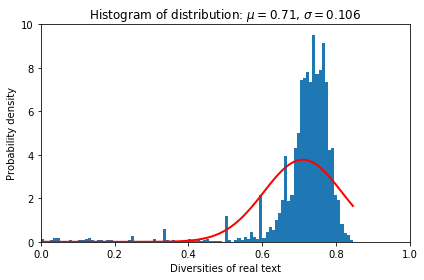

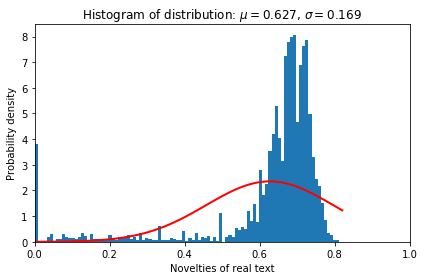

In [3]:
normal_distribution(jac_real_diversities, 'Diversities of real text')
normal_distribution(jac_real_novelties, 'Novelties of real text')

## Levenshtein distance metric

Levenshtein distance needs to normalised

In [4]:
# Read the metrics results from the file
lev_real_diversities_distances = read_list('analysis_levenshtein/levenshtein_diversities_real.txt')
lev_real_novelties_distances = read_list('analysis_levenshtein/levenshtein_novelties_real.txt')
lev_fake_diversities_distances = read_list('analysis_levenshtein/levenshtein_diversities_fake2.txt')
lev_fake_novelties_distances = read_list('analysis_levenshtein/levenshtein_novelties_fake2.txt')

# normalise all the results
normed_real_diversities = normalize(lev_real_diversities_distances)
normed_real_novelties = normalize(lev_real_novelties_distances)
normed_fake_diversities = normalize(lev_fake_diversities_distances)
normed_fake_novelties = normalize(lev_fake_novelties_distances)

# Transform distances to similarities
lev_normed_real_diversities = normed_dists_to_sims(normed_fake_diversities)
lev_normed_real_novelties = normed_dists_to_sims(normed_real_novelties)
lev_normed_fake_diversities = normed_dists_to_sims(normed_fake_diversities)
lev_normed_fake_novelties = normed_dists_to_sims(normed_fake_diversities)

## Word Mover's Distance metric

Word Mover's Distance needs to normalised

In [5]:
# Read the metrics results from the file
wmd_real_diversities_distances = read_list('analysis_word_emb/wmd_diversities_real.txt')
wmd_real_novelties_distances = read_list('analysis_word_emb/wmd_novelties_real.txt')
wmd_fake_diversities_distances = read_list('analysis_word_emb/wmd_diversities_fake2.txt')
wmd_fake_novelties_distances = read_list('analysis_word_emb/wmd_novelties_fake2.txt')

# normalise all the results
normed_real_diversities = normalize(wmd_real_diversities_distances)
normed_real_novelties = normalize(wmd_real_novelties_distances)
normed_fake_diversities = normalize(wmd_fake_diversities_distances)
normed_fake_novelties = normalize(wmd_fake_novelties_distances)

# Transform distances to similarities
wmd_normed_real_diversities = normed_dists_to_sims(normed_fake_diversities)
wmd_normed_real_novelties = normed_dists_to_sims(normed_real_novelties)
wmd_normed_fake_diversities = normed_dists_to_sims(normed_fake_diversities)
wmd_normed_fake_novelties = normed_dists_to_sims(normed_fake_diversities)

print(max(wmd_real_diversities_distances))
print(max(wmd_real_novelties_distances))
print(max(wmd_fake_diversities_distances))
print(max(wmd_fake_novelties_distances))

1.2760173970789273
1.2760173970789273
1.2760173970789273
1.2760173970789273


In [6]:
def stacked_hist(data, name):
    n_bins=100
    colors = ["Real", "Fake"]
    plt.hist(data, n_bins, density=1, histtype='bar', stacked=True, label=colors)
    plt.legend(loc="upper right")
    plt.title(name)
    plt.show()
    
def _stacked_hist(data):
    n_bins=100
    colors = ["Real", "Fake"]
    plt.hist(data, n_bins, density=1, histtype='bar', stacked=True, label=colors)
    plt.legend(loc="upper right")
#     plt.title(name)
    plt.show()
    
def combine_metrics_list(list1, list2, list3):
    combined_list = [list1]
    combined_list.append(list2)
    combined_list.append(list3)
    
    return combined_list

def combine_real_fake(real_list, fake_list):
    combined_list = [real_list]
    combined_list.append(fake_list)
    return combined_list

## Jaccard Novelty and Diversity

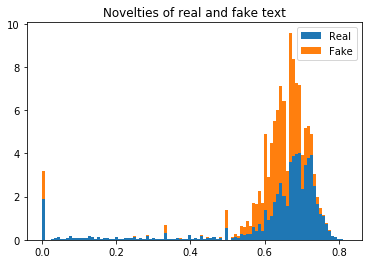

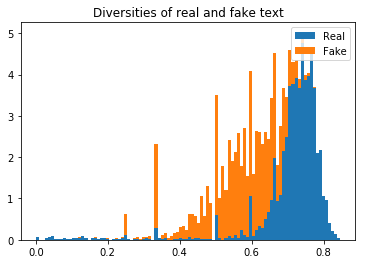

In [7]:
# Novelties of real and fake text using jaccard similarity metric
jac_novs = combine_real_fake(jac_real_novelties, jac_fake_novelties)
stacked_hist(jac_novs, "Novelties of real and fake text")

# Diversities of real and fake text using jaccard similarity metric
jac_divs = combine_real_fake(jac_real_diversities, jac_fake_diversities)
stacked_hist(jac_divs, "Diversities of real and fake text")

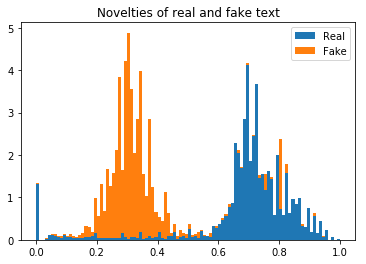

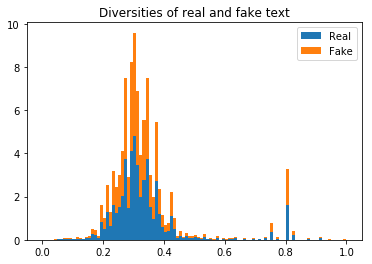

In [8]:
# Novelties of real and fake text using levenshtein metric
lev_novs = combine_real_fake(lev_normed_real_novelties, lev_normed_fake_novelties)
stacked_hist(lev_novs, "Novelties of real and fake text")

# Diversities of real and fake text using levenshtein metric
lev_divs = combine_real_fake(lev_normed_real_diversities, lev_normed_fake_diversities)
stacked_hist(lev_divs, "Diversities of real and fake text")

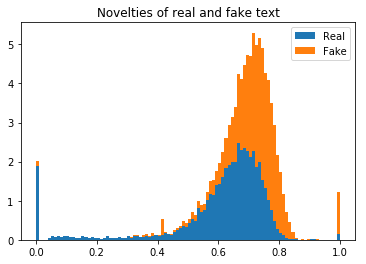

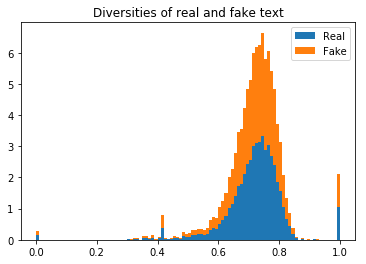

In [9]:
# Novelties of real and fake text using WMD metric
wmd_novs = combine_real_fake(wmd_normed_real_novelties, wmd_normed_fake_novelties)
stacked_hist(wmd_novs, "Novelties of real and fake text")

# Diversities of real and fake text using WMD metric
wmd_divs = combine_real_fake(wmd_normed_real_diversities, wmd_normed_fake_diversities)
stacked_hist(wmd_divs, "Diversities of real and fake text")

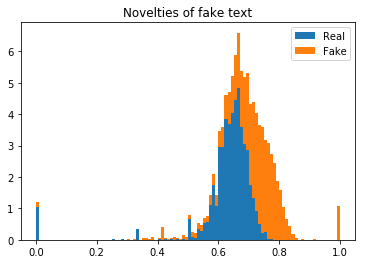

In [10]:
combined_fake_novelties = [jac_fake_novelties]
combined_fake_novelties.append(wmd_normed_fake_novelties)

stacked_hist(combined_fake_novelties,  "Novelties of fake text")

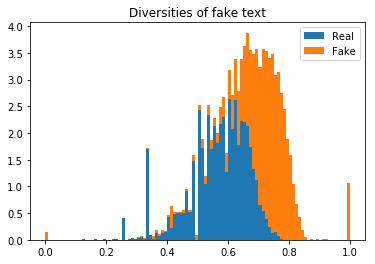

In [11]:
combined_fake_diversities = [jac_fake_diversities]
combined_fake_diversities.append(wmd_normed_fake_diversities)

stacked_hist(combined_fake_diversities,  "Diversities of fake text")

/Users/dc/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1357: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


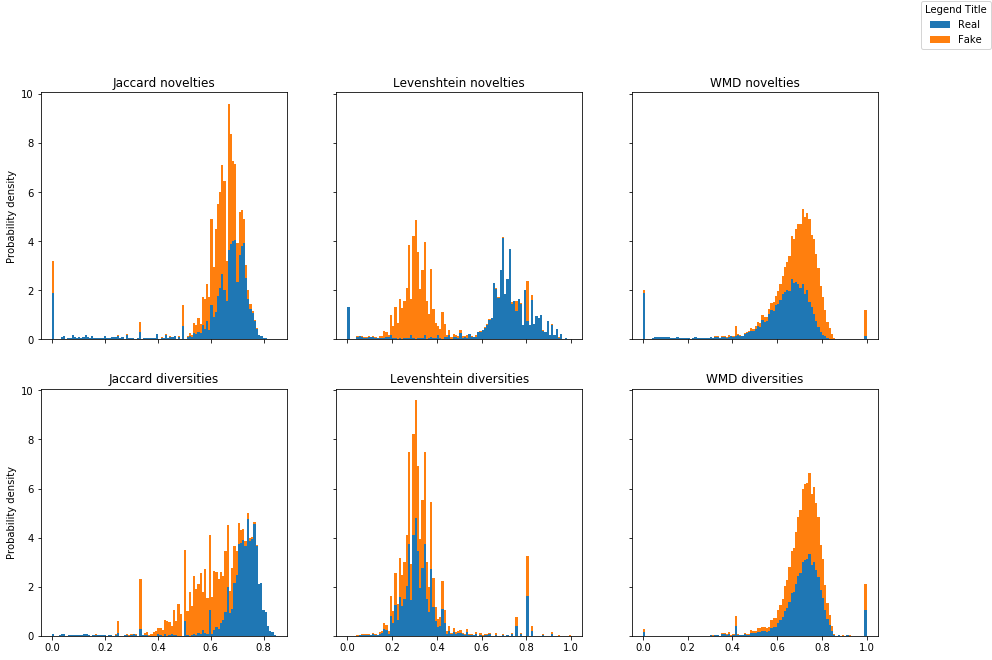

In [12]:
n_bins=100
colors = ["Real", "Fake"]
# plt.hist(jac_novs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
# plt.legend(loc="upper right")

fig, axarr = plt.subplots(2, 3, sharex='col', sharey='row')

p1 = axarr[0, 0].hist(jac_novs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
axarr[0, 0].set_title('Jaccard novelties')
p2 = axarr[0, 1].hist(lev_novs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
axarr[0, 1].set_title('Levenshtein novelties')
p3 = axarr[0, 2].hist(wmd_novs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
axarr[0, 2].set_title('WMD novelties')
p4 = axarr[1, 0].hist(jac_divs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
axarr[1, 0].set_title('Jaccard diversities')
p5 = axarr[1, 1].hist(lev_divs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
axarr[1, 1].set_title('Levenshtein diversities')
p6 = axarr[1, 2].hist(wmd_divs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
axarr[1, 2].set_title('WMD diversities')

line_labels = colors
fig.legend([p1, p6],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Legend Title"  # Title for the legend
           )

fig.set_figheight(10)
fig.set_figwidth(15)

for ax in axarr.flat:
    ax.set(ylabel='Probability density')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axarr.flat:
    ax.label_outer()

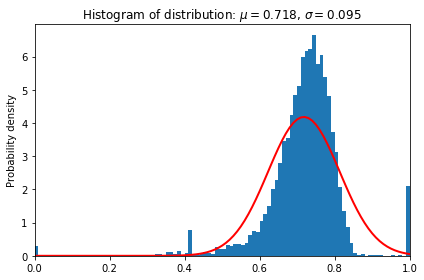

In [13]:
normal_distribution((wmd_normed_real_diversities), "")